Analysis of the bluetooth positioning measurements made on 2023.11.13.\
The measurements were made with 2 antenna arrays(anchors) and a stationary tag. The tag was placed in 24 different locations.\
This notebook is an analysis of one of the measurements made at a location. 


In [485]:
%load_ext autoreload
%autoreload 2

#imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [486]:
# Counts the measurements made by a specified anchor_id
def count_measurements(df, search_string):
        df_filtered = df.loc[:, (df == search_string).any(axis=0)]
        return df_filtered.value_counts()[search_string]

# Filters the file by a specified anchor_id
def filter_by_anchor_id(df, search_string):
        df_filtered = df[df["anchor_id"].str.contains(search_string)]
        return df_filtered

# Draws histogram
def create_hist(ax, anchor_id, measurements, tag, anchors):
        data = filter_by_anchor_id(measurements, anchor_id).angle_azimuth
        n, b, patches = ax.hist(data, bins = max(data) - min(data) + 1, edgecolor = "white", range = [min(data), max(data) + 1], align = "left")
        true_angle = get_true_angle(tag, anchors, anchor_id)
        
        if(true_angle >= min(data) and true_angle <= max(data)):
                patches[true_angle - min(data)].set_fc("red")
                
        red_patch = mpatches.Patch(color="red", label="True angle: " + str(true_angle))
        ax.legend(handles=[red_patch])

        ax.tick_params(axis = 'x', labelrotation = 90, labelsize=7)
        ax.set_xticks(range(min(data), max(data) + 1))
        ax.set_xlim([min(data) - 0.5, max(data) + 0.5])
        ax.set_xlabel('Measured azimuth angle') 
        ax.set_ylabel('Number of measurements')
        ax.spines["top"].set_visible(False)  
        ax.spines["right"].set_visible(False)

# Returns the azimuth angle of an anchor and a tag
def get_true_angle(tag, anchors, anchor_id):
        tx = tag["x"].iloc[0]
        ty = tag["y"].iloc[0]

        if(anchor_id == anchors["anchor_id"].iloc[0]):
                anch_x = anchors["x"].iloc[0]
                anch_y = anchors["y"].iloc[0]
                return int(math.degrees(math.atan((anch_y - ty)/(tx - anch_x))))
        elif(anchor_id == anchors["anchor_id"].iloc[1]):
                anch_x = anchors["x"].iloc[1] 
                anch_y = anchors["y"].iloc[1]
                return int(-1 * math.degrees(math.atan((anch_x - tx)/(ty - anch_y))))

def create_scatter(ax, measurements, tag, anchors):
        ax.scatter(anchors.x, anchors.y, c='black', marker="s")
        ax.scatter(tag.x, tag.y, c = "red", marker = "d")
        angles1 = filter_by_anchor_id(measurements, anchor_id1).angle_azimuth
        angles2 = filter_by_anchor_id(measurements, anchor_id2).angle_azimuth

        ax.set_xlim(left=0.3, right=2.6)
        ax.set_ylim(bottom=-0.1, top=3.2)

        for i in angles1:
                dest = 3.05 - 2.1 * math.tan(math.radians(abs(i)))
                x, y = [0.4,2.5], [3.05,dest]
                ax.plot(x, y, linewidth = 0.5, c = "c", linestyle = "dotted", alpha=0.1)

        for i in angles2:
                dest = 2.5 - 3.05 * math.tan(math.radians(abs(i)))
                x, y = [2.5,dest], [0,3.2]
                ax.plot(x, y, linewidth = 0.5, c = "c", linestyle = "dotted", alpha=0.1)
        
   
                

        #ax.plot([lines[from], lines[to]], [lines[from], lines[to]], color='purple', alpha=0.05)
        
        

The two rows of histograms show the measured azimuth angles of a tag placed in 4 different positions from two anchors.


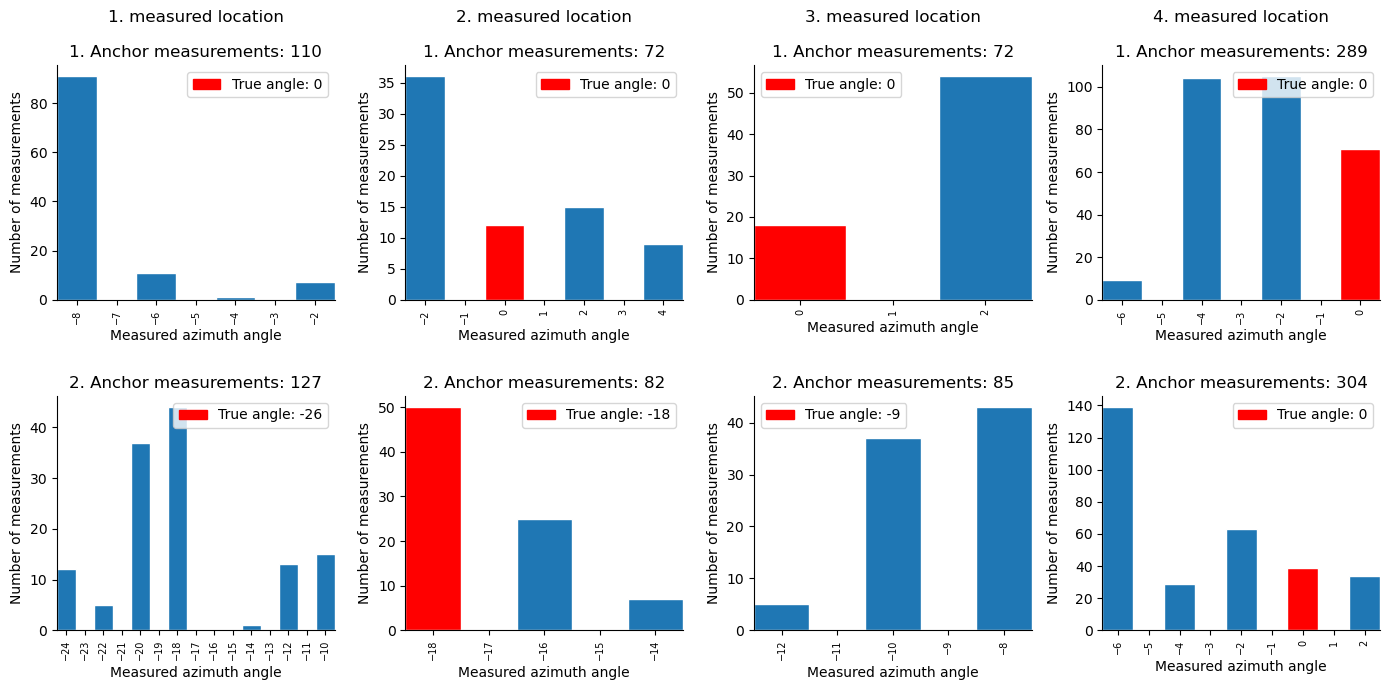

In [487]:
# Storing the anchor ids
anchors = pd.read_csv("measurement1/config/anchors.csv")
anchor_id1 = anchors["anchor_id"].iloc[0]
anchor_id2 = anchors["anchor_id"].iloc[1]

# Importing the measurements
measurements = [0, 0, 0, 0]
measurements[0] = pd.read_csv("measurement1/6C1DEBA4241B_measurements.csv")
measurements[1] = pd.read_csv("measurement2/6C1DEBA4241B_measurements.csv")
measurements[2] = pd.read_csv("measurement3/6C1DEBA4241B_measurements.csv")
measurements[3] = pd.read_csv("measurement4/6C1DEBA4241B_measurements.csv")

# Importing tag coordinates
tag = [0, 0, 0, 0]
tag[0] = pd.read_csv("measurement1/config/tag_coordinates.csv")
tag[1] = pd.read_csv("measurement2/config/tag_coordinates.csv")
tag[2] = pd.read_csv("measurement3/config/tag_coordinates.csv")
tag[3] = pd.read_csv("measurement4/config/tag_coordinates.csv")


# Creating plot
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (14, 7), tight_layout = True)

# Generating histograms
for i in range(2):
    for j in range(4):
        ax = axes[i][j]
        if(i == 0):
            create_hist(ax, anchor_id1, measurements[j], tag[j], anchors)
            ax.set_title(str(j + 1) + ". measured location\n\n1. Anchor measurements: " + str(count_measurements(measurements[j], anchor_id1)))
        else:
            create_hist(ax, anchor_id2, measurements[j], tag[j], anchors)
            ax.set_title("\n2. Anchor measurements: " + str(count_measurements(measurements[j], anchor_id2)))
 
# Show plot
plt.show()

The next diagram shows the location of the tag and the two anchors, and the measured location of the tag.

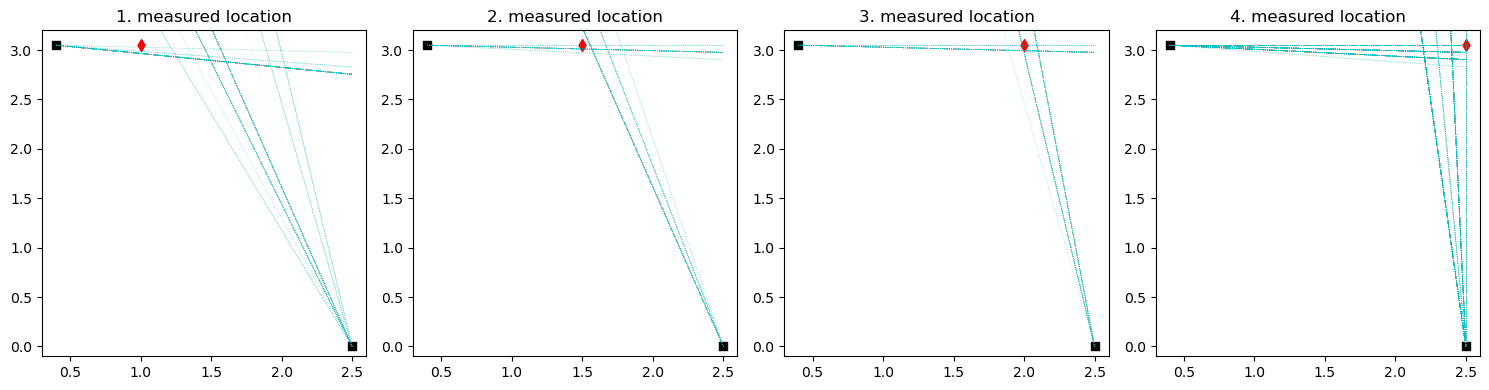

In [488]:
fig, axes = plt.subplots(1, 4, figsize = (15,4), tight_layout = True)

for i in range(4):
   ax = axes[i]
   create_scatter(ax, measurements[i], tag[i], anchors)
   ax.set_title(str(i + 1) + ". measured location")

# Show plot
plt.show()